In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('admission_data.csv')

In [3]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
df.shape

(500, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.duplicated().sum()

0

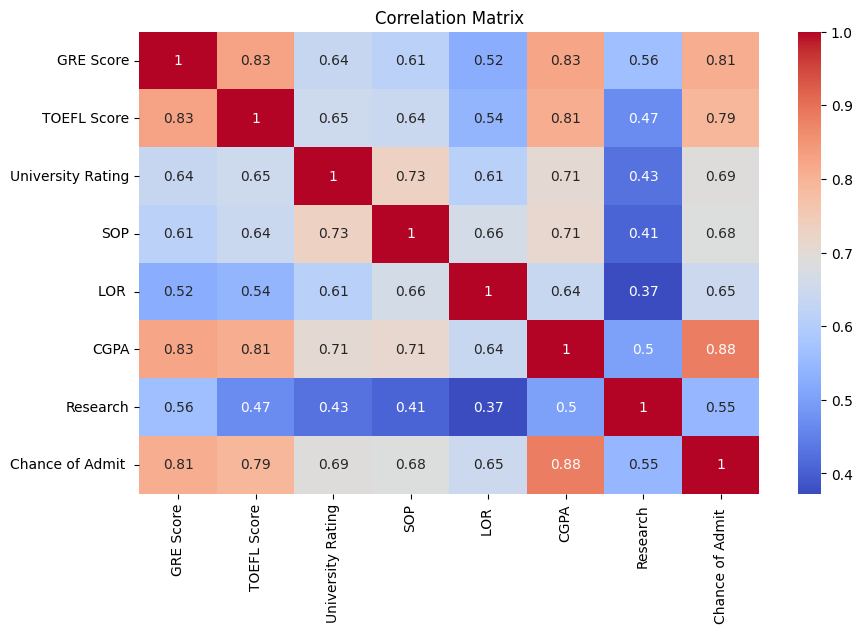

In [10]:
# Step 4: Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [11]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
x_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
361,334,116,4,4.0,3.5,9.54,1
73,314,108,4,4.5,4.0,9.04,1
374,315,105,2,2.0,2.5,7.65,0
155,312,109,3,3.0,3.0,8.69,0
104,326,112,3,3.5,3.0,9.05,1
...,...,...,...,...,...,...,...
347,299,94,1,1.0,1.0,7.34,0
86,315,106,3,4.5,3.5,8.42,0
75,329,114,2,2.0,4.0,8.56,1
438,318,110,1,2.5,3.5,8.54,1


In [15]:
y_test

361    0.93
73     0.84
374    0.39
155    0.77
104    0.74
       ... 
347    0.42
86     0.72
75     0.72
438    0.67
15     0.54
Name: Chance of Admit , Length: 100, dtype: float64

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [17]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred=reg.predict(x_test)

In [19]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
ridge=Ridge(alpha=1.0)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [21]:
lasso=Lasso(alpha=0.01)
lasso.fit(x_train,y_train)
y_pred_lasso=lasso.predict(x_test)

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Mean Absolute Error:",mae)

Mean Squared Error: 0.003704655398788412
R^2 Score: 0.8188432567829628
Mean Absolute Error: 0.04272265427705368


In [23]:
lassomse = mean_squared_error(y_test, y_pred_lasso)
lassor2 = r2_score(y_test, y_pred_lasso)
lassomae=mean_absolute_error(y_test,y_pred_lasso)
print("Mean Squared Error:", lassomse)
print("R^2 Score:", lassor2)
print("Mean Absolute Error:",lassomae)

Mean Squared Error: 0.0038037941002089094
R^2 Score: 0.8139953985227918
Mean Absolute Error: 0.04270927740179335


In [24]:
ridgemse = mean_squared_error(y_test, y_pred_ridge)
ridger2 = r2_score(y_test, y_pred_ridge)
ridgemae=mean_absolute_error(y_test,y_pred_ridge)
print("Mean Squared Error:", ridgemse)
print("R^2 Score:", ridger2)
print("Mean Absolute Error:",ridgemae)

Mean Squared Error: 0.0037057743637988107
R^2 Score: 0.8187885396675398
Mean Absolute Error: 0.042747194746281504


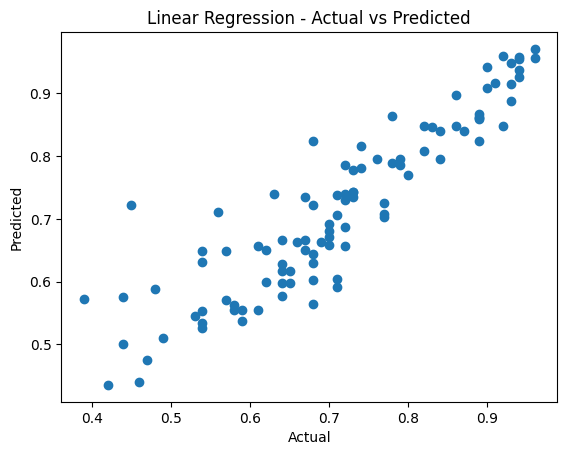

In [25]:
# Step 11: Scatter Plot of Actual vs Predicted

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression - Actual vs Predicted")
plt.show()


In [26]:
residuals=y_test-y_pred
residuals

361    0.015425
73     0.044819
374   -0.182660
155    0.062630
104   -0.075883
         ...   
347   -0.015631
86     0.033357
75    -0.065988
438   -0.064694
15    -0.108657
Name: Chance of Admit , Length: 100, dtype: float64

In [27]:
df_results=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(df_results)

     Actual  Predicted
361    0.93   0.914575
73     0.84   0.795181
374    0.39   0.572660
155    0.77   0.707370
104    0.74   0.815883
..      ...        ...
347    0.42   0.435631
86     0.72   0.686643
75     0.72   0.785988
438    0.67   0.734694
15     0.54   0.648657

[100 rows x 2 columns]


In [28]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
accuracy = 100 - mape
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 93.14%


In [29]:
# Step 12: Predict for New Input

# Example: GRE=320, TOEFL=110, UnivRating=4, SOP=4.5, LOR=4.0, CGPA=9.0, Research=1
input_features = [[320, 110, 4, 4.5, 4.0, 9.0, 1]]
input_scaled = scaler.transform(input_features)
predicted_chance = reg.predict(input_scaled)
print("Predicted Chance of Admit:", round(predicted_chance[0], 4))


Predicted Chance of Admit: 0.8113


In [30]:
#selectimg from the dataset
# Pick a specific row by index (e.g., index 5)
sample_row = df.drop("Chance of Admit ", axis=1).iloc[5]  # remove target and select the row
sample_scaled = scaler.transform([sample_row])            # scale the row
prediction = reg.predict(sample_scaled)

print("Selected Row Features:\n", sample_row)
print("Predicted Chance of Admit:", round(prediction[0], 4))


Selected Row Features:
 GRE Score            330.00
TOEFL Score          115.00
University Rating      5.00
SOP                    4.50
LOR                    3.00
CGPA                   9.34
Research               1.00
Name: 5, dtype: float64
Predicted Chance of Admit: 0.8742


In [31]:
# View the original row with index 5 (including all features + target)
df.iloc[5]


GRE Score            330.00
TOEFL Score          115.00
University Rating      5.00
SOP                    4.50
LOR                    3.00
CGPA                   9.34
Research               1.00
Chance of Admit        0.90
Name: 5, dtype: float64

In [32]:
#comparing with actual
# Compare predicted vs actual for any row (e.g., index 10)
index = 10
row = df.drop("Chance of Admit ", axis=1).iloc[index]
row_scaled = scaler.transform([row])
pred = reg.predict(row_scaled)
actual = df["Chance of Admit "].iloc[index]

print(f"Predicted: {round(pred[0], 4)} | Actual: {actual}")


Predicted: 0.7396 | Actual: 0.52


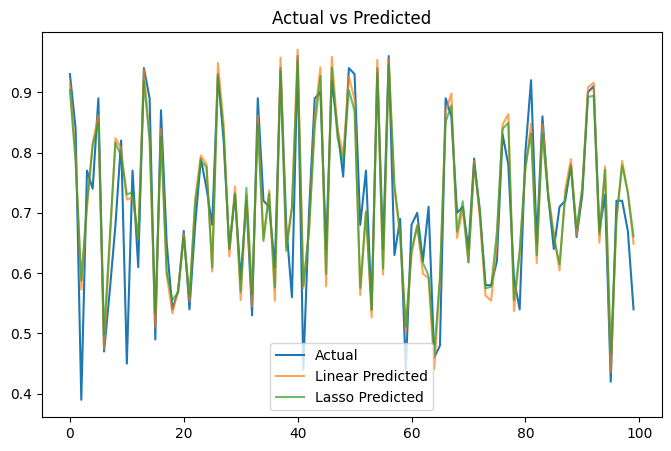

In [33]:
plt.figure(figsize=(8,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Linear Predicted", alpha=0.7)
plt.plot(y_pred_lasso, label="Lasso Predicted", alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted")
plt.show()
